# Homework 19: Unsupervised Learning

**1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.**

Supervised
- Regression
    - Linear regression (simple or multiple)
    - KNN regressor
    - Decision tree regressor
    - Random forest regressor
    - Support vector regressor
- Classification
    - K-nearest neighbors (KNN)
    - Decision trees
    - Random forest
    - XGboost
    - Support vector machines
    - Logistic regression

**2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.**

Unsupervised
- Dimensionality reduction
    - LDA
    - PCA
    - Isomap embedding
- Clustering
    - K-means
    - Hierarchical agglomerative clustering

**3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?**

First, as I think about customer segmentation, there are certain variables that I believe would help me better understand my customers more than others. For example, I want to know how much they are buying (quantity), but I also want to know the total amount they are spending. Moreover, it might be interesting to see how recent their purchases have been. In general, I definitely want to know who my "best" and "worst" customers are. Based on that, I will beging the preprocessing steps below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read in the data file
ecom = pd.read_csv('data.csv', encoding= 'unicode_escape')
# View the top 15 results
ecom.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


I see below that the date column is an object. I will quickly convert that to a datetime variable.

In [2]:
# Examine the column types
ecom.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [3]:
# Convert to datetime
ecom['InvoiceDate'] = pd.to_datetime(ecom['InvoiceDate'])
ecom['InvoiceDate'].dtype

dtype('<M8[ns]')

Below, I see that there are a lot of missing values for customerID. It would not be prudent to simply fill this with a placeholder value of 99 because then all of the missing values would be treated as just 1 customer. Because the accuracy of customer ID column is so crucial to the analysis, I will have to remove all row with missing customerID.

In [4]:
# Check missing data
ecom.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Remove missing customerID
ecom_df = ecom.dropna(subset=['CustomerID'])
len(ecom_df.index)

406829

In [6]:
# Notice how removing the missing customerIDs also removed the missing 'descriptions'
ecom_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

I am also very interested in understanding the total amount that each customer has spent, so I will create a new variable for that. 

In [7]:
# Create amount variable
ecom_df['Total_Amount'] = ecom_df['Quantity']*ecom_df['UnitPrice']
ecom_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [31]:
# The minimum values for quantity and total amount do not make a ton of sense, so I would like to look more 
# into the quantity variable; moreover, min unit price is $0; I doubt any items are free, so these might be returns
ecom_df.describe()

,Quantity,UnitPrice,CustomerID,Total_Amount
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


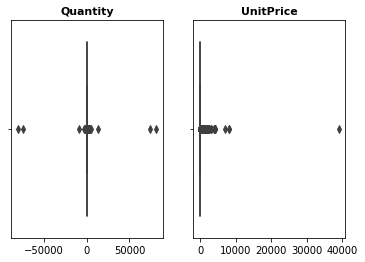

In [38]:
# Set up box plots
fig, axes = plt.subplots(1,2)

# Set up the box plots in each subplot
sns.boxplot(x='Quantity', color='lightseagreen', data=ecom_df, ax=axes[0])
sns.boxplot(x='UnitPrice', color='lightseagreen', data=ecom_df, ax=axes[1])

# Format the axes
axes[0].set_title('Quantity', size=11, weight='bold')
axes[0].set_xlabel('')

axes[1].set_title('UnitPrice', size=11, weight='bold')
axes[1].set_xlabel('')

# Show plot
plt.show()

Because you cannot purchase zero quantity of something (or negative quantity) and because these likely represent returns or order cancellations, I will remove them from my data set as well. I will also remove where unit price is zero because nothing in life is free!

In [8]:
# Fill nulls for all quantity values equal to or less than 0
ecom_df['Quantity'] = np.where(ecom_df['Quantity'] <= 0, np.nan, ecom_df['Quantity'])

# Fill nulls for all unit price values equal to or less than 0
ecom_df['UnitPrice'] = np.where(ecom_df['UnitPrice'] <= 0, np.nan, ecom_df['UnitPrice'])

# Remove all rows with any nulls
ecom_df = ecom_df.dropna(axis=0, how='any')

In [48]:
# Everything appears to be good
ecom_df.sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1.0,7/26/2011 10:13,0.001,15618.0,United Kingdom,0.001
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1.0,4/15/2011 9:27,0.001,13952.0,United Kingdom,0.001
361741,568375,BANK CHARGES,Bank Charges,1.0,9/26/2011 17:01,0.001,13405.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1.0,9/25/2011 14:58,0.001,16198.0,United Kingdom,0.001
407634,571904,16045,POPART WOODEN PENCILS ASST,100.0,10/19/2011 14:41,0.040,12522.0,Germany,4.000
...,...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1.0,10/3/2011 16:44,3155.950,15502.0,United Kingdom,3155.950
406406,571751,M,Manual,1.0,10/19/2011 11:18,3949.320,12744.0,Singapore,3949.320
422376,573080,M,Manual,1.0,10/27/2011 14:20,4161.060,12536.0,France,4161.060
422351,573077,M,Manual,1.0,10/27/2011 14:13,4161.060,12536.0,France,4161.060


Now, group by customerID, since that is what I am most interested in. I will aggregate other variables of interest as appropriate.

In [190]:
# Group by customerID
ecom_group = ecom_df.groupby('CustomerID')

# Aggregate by total amount
                            # Sum of total amount
ecom_agg = ecom_group.agg({'Total_Amount':'sum',
                           # Sum of quantity to find the total items purchased
                           'Quantity':'sum',
                           # mean of unit price to find the average price of one item
                           'UnitPrice': 'mean',
                           # unique country
                           'Country': 'min',
                           # Max invoice date to see the most recent purchase
                           'InvoiceDate': 'max',
                           # unique invoice numbers to see total purchases
                          'InvoiceNo':'nunique'})

ecom_agg

,Total_Amount,Quantity,UnitPrice,Country,InvoiceDate,InvoiceNo
CustomerID,,,,,,
12346.0,77183.60,74215.0,1.040000,United Kingdom,2011-01-18 10:01:00,1
12347.0,4310.00,2458.0,2.644011,Iceland,2011-12-07 15:52:00,7
12348.0,1797.24,2341.0,5.764839,Finland,2011-09-25 13:13:00,4
12349.0,1757.55,631.0,8.289041,Italy,2011-11-21 09:51:00,1
12350.0,334.40,197.0,3.841176,Norway,2011-02-02 16:01:00,1
...,...,...,...,...,...,...
18280.0,180.60,45.0,4.765000,United Kingdom,2011-03-07 09:52:00,1
18281.0,80.82,54.0,5.622857,United Kingdom,2011-06-12 10:53:00,1
18282.0,178.05,103.0,5.199167,United Kingdom,2011-12-02 11:43:00,2


In [193]:
# Organize the data frame with columns renamed
customer_df = pd.DataFrame({'Total_Sales': ecom_agg['Total_Amount'], 
                            'Total_Items_Purchased': ecom_agg['Quantity'], 
                            'Average_Price_per_Item': round((ecom_agg['UnitPrice']),2),
                            'Most_Recent_Purchase': ecom_agg['InvoiceDate'], 
                            'Total_Transactions': ecom_agg['InvoiceNo'],
                           'Country':ecom_agg['Country']})
customer_df.head()

,Total_Sales,Total_Items_Purchased,Average_Price_per_Item,Most_Recent_Purchase,Total_Transactions,Country
CustomerID,,,,,,
12346.0,77183.60,74215.0,1.04,2011-01-18 10:01:00,1,United Kingdom
12347.0,4310.00,2458.0,2.64,2011-12-07 15:52:00,7,Iceland
12348.0,1797.24,2341.0,5.76,2011-09-25 13:13:00,4,Finland
12349.0,1757.55,631.0,8.29,2011-11-21 09:51:00,1,Italy
12350.0,334.40,197.0,3.84,2011-02-02 16:01:00,1,Norway


Next, I'll do some basic features engineering on my date variable. I would like to see how recent my customers' purchases are and convert it to days so that is is easier to calculate. 

In [194]:
import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler, Normalizer

# Get today's date
today = date.today()

# Format to match the 'most_recent' date variable
now = pd.to_datetime(today.strftime('%m/%d/%Y %H:%M'))

# Make new column to show the days since purchase. This will be easier to analyze
customer_df['Days_since_purchase'] = (now - customer_df['Most_Recent_Purchase']).dt.days

# Drop the old variable
customer_df = customer_df.drop('Most_Recent_Purchase', axis=1)

# View data frame
customer_df.head()

,Total_Sales,Total_Items_Purchased,Average_Price_per_Item,Total_Transactions,Country,Days_since_purchase
CustomerID,,,,,,
12346.0,77183.60,74215.0,1.04,1,United Kingdom,4034
12347.0,4310.00,2458.0,2.64,7,Iceland,3711
12348.0,1797.24,2341.0,5.76,4,Finland,3784
12349.0,1757.55,631.0,8.29,1,Italy,3727
12350.0,334.40,197.0,3.84,1,Norway,4019


Finally, I will normalize all of my data before computing any models. This is also an edit. I had previously standardized all of my values. I iterated through the process again to see if normalizing would produce better results. In fact, it did, so that is what I decided to go with. See code below.

In [195]:
# Extract values
x = customer_df.drop('Country', axis=1).values 
# Create Normalizer instance
n = Normalizer()
# Fit the normalizer to my data
x_norm = n.fit_transform(x)
# Add back to data frame
df = pd.DataFrame(x_norm)
# View standardized data
df.head()

,0,1,2,3,4
0,0.720322,0.692617,0.000010,0.000009,0.037648
1,0.695619,0.396713,0.000426,0.001130,0.598942
2,0.374514,0.487824,0.001200,0.000834,0.788521
3,0.421610,0.151368,0.001989,0.000240,0.894052
4,0.082819,0.048790,0.000951,0.000248,0.995369


**4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?**

Inertia helps measure how spread out our different clusters are. Basically, how far samples are from their centroids. Because it's better for clusters to not be too spread out, it is best to find lower intertia values. A popular way to plot inertias is through the "elbow" method. This is when we plot intertia on the y-axis and possible k values on the x-axis. Despite wanting low intertia, we also don't want too many clusters. Therefore, we find the location where the intertia begins to decrease at a slower rate. I will, thus, use the elbow method below to find the ideal number of clusters.

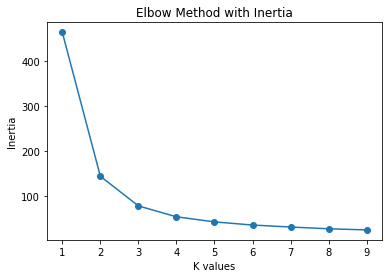

In [196]:
# Load in necessary libraries
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Create a range of possible k values
k_values = range(1, 10)
# Empty list to append intertia values to
inertias = []

# Iterate through the k-values
for k in k_values:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to scaled data
    model.fit(x_norm)
    # Append inertia values to list of inertias
    inertias.append(model.inertia_)
    
# Plot k values vs inertias
plt.plot(k_values, inertias, '-o')
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertia')
plt.show()

Based on the plot above, I believe the best number of clusters for this data set would be 3. This is the lowest value of k for which the intertia is starting to decrease at a slower rate. I will now create the model instance below.

In [197]:
# Create model instance
model = KMeans(n_clusters=3)

# Fit the model to our scaled data
model.fit(x_norm)

# Get prediction labels
cluster = model.predict(x_norm)

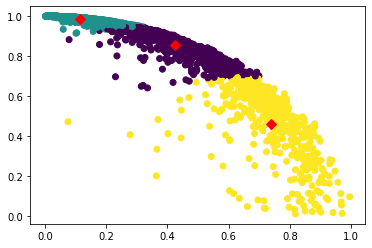

In [198]:
# View initial scatter plot of customer clusters, along with their centroids

# Total sales
sales = x_norm[:,0]
# Days since purchase
days = x_norm[:,4]

# Extract the cluster centroids
centroids = model.cluster_centers_

# Extract the centroids from the columns (0 and 4)
centroids_x = centroids[:,0]
centroids_y = centroids[:,4]

# Make a scatter plot of the scaled data with their centroids
plt.scatter(sales, days, c=cluster)
plt.scatter(centroids_x, centroids_y, marker='D', c='red', s=50)

# View plot
plt.show()

In [199]:
# Add the clusters back into the data set
df['cluster'] = cluster
df.head()

,0,1,2,3,4,cluster
0,0.720322,0.692617,0.000010,0.000009,0.037648,2
1,0.695619,0.396713,0.000426,0.001130,0.598942,2
2,0.374514,0.487824,0.001200,0.000834,0.788521,0
3,0.421610,0.151368,0.001989,0.000240,0.894052,0
4,0.082819,0.048790,0.000951,0.000248,0.995369,1


**5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?**

Based on the heirarchical clustering method, it appears that 3 still remains the ideal number of clusters. To find this number as the most ideal, I looked at the height of the chart where there was the maximum distance between clusters. I then counted that there were 3 clusters. 

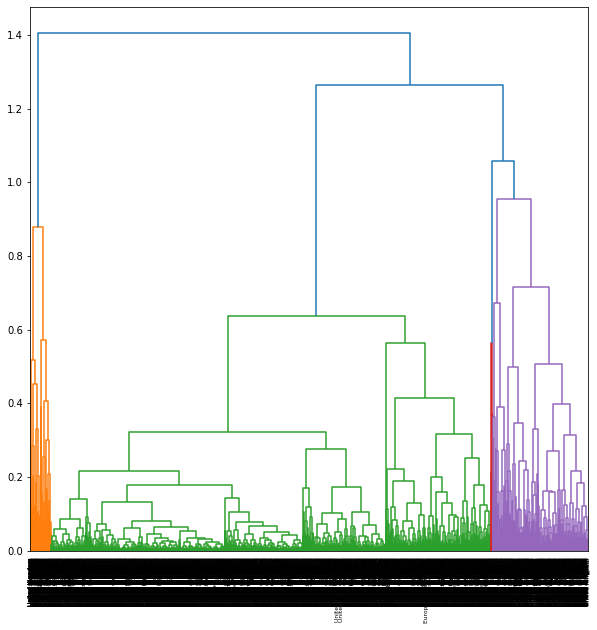

In [207]:
# Isolate the country variable
y = customer_df['Country']

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage
linked = linkage(x_norm, method='complete')

# Plot the dendrogram to visualize clusters
plt.figure(figsize=(10,10))
dendrogram(linked, 
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

**6.	Compare the results of 4 and 5. Which approach do you think is best? Why?** 

I definitely preferred the first approach (using the elbow method) best. On the one hand, I appreciate the visual representation of the dendrogram. However, it seems very computationally expensive, as it takes very long to run. I also wonder about the scalability of this method. For example, the e-commerce data is quite large, meaning this dendrogram is already a little overwhelming to look at. The previous approach, on the other hand, was able to run much more smoothly and was actually easier for me to interpret. Plus, with both methods, I still ended up with 3 clusters!

In [209]:
# Add the clusters back into the data set
customer_df['cluster'] = cluster
customer_df.sort_values('cluster')

,Total_Sales,Total_Items_Purchased,Average_Price_per_Item,Total_Transactions,Country,Days_since_purchase,cluster
CustomerID,,,,,,,
18287.0,1837.28,1586.0,1.49,3,United Kingdom,3751,0
14030.0,2360.09,1479.0,4.05,8,United Kingdom,3727,0
14019.0,1421.61,1037.0,2.41,3,United Kingdom,3755,0
16426.0,1908.25,1243.0,2.09,10,United Kingdom,3711,0
14005.0,2874.72,2478.0,2.21,5,United Kingdom,3718,0
...,...,...,...,...,...,...,...
15640.0,12515.66,6607.0,2.79,15,United Kingdom,3713,2
15676.0,3435.76,2252.0,3.20,3,United Kingdom,3727,2
15694.0,6479.40,1677.0,4.71,14,United Kingdom,3709,2


<AxesSubplot:xlabel='Total_Sales', ylabel='Days_since_purchase'>

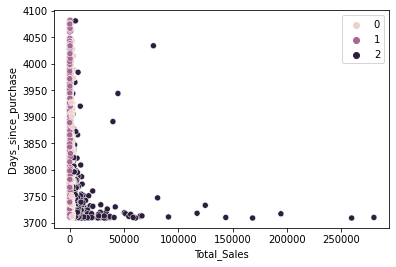

In [210]:
sns.scatterplot(x='Total_Sales', y='Days_since_purchase', data=customer_df, hue=cluster)

<AxesSubplot:xlabel='Country', ylabel='Average_Price_per_Item'>

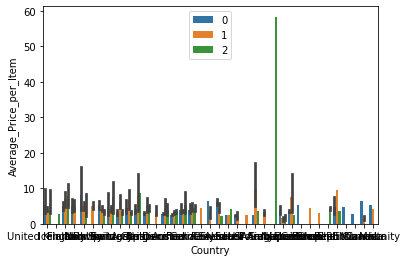

In [211]:
sns.barplot(x='Country', y='Average_Price_per_Item', data=customer_df, hue=cluster)

# Data Camp Certificate

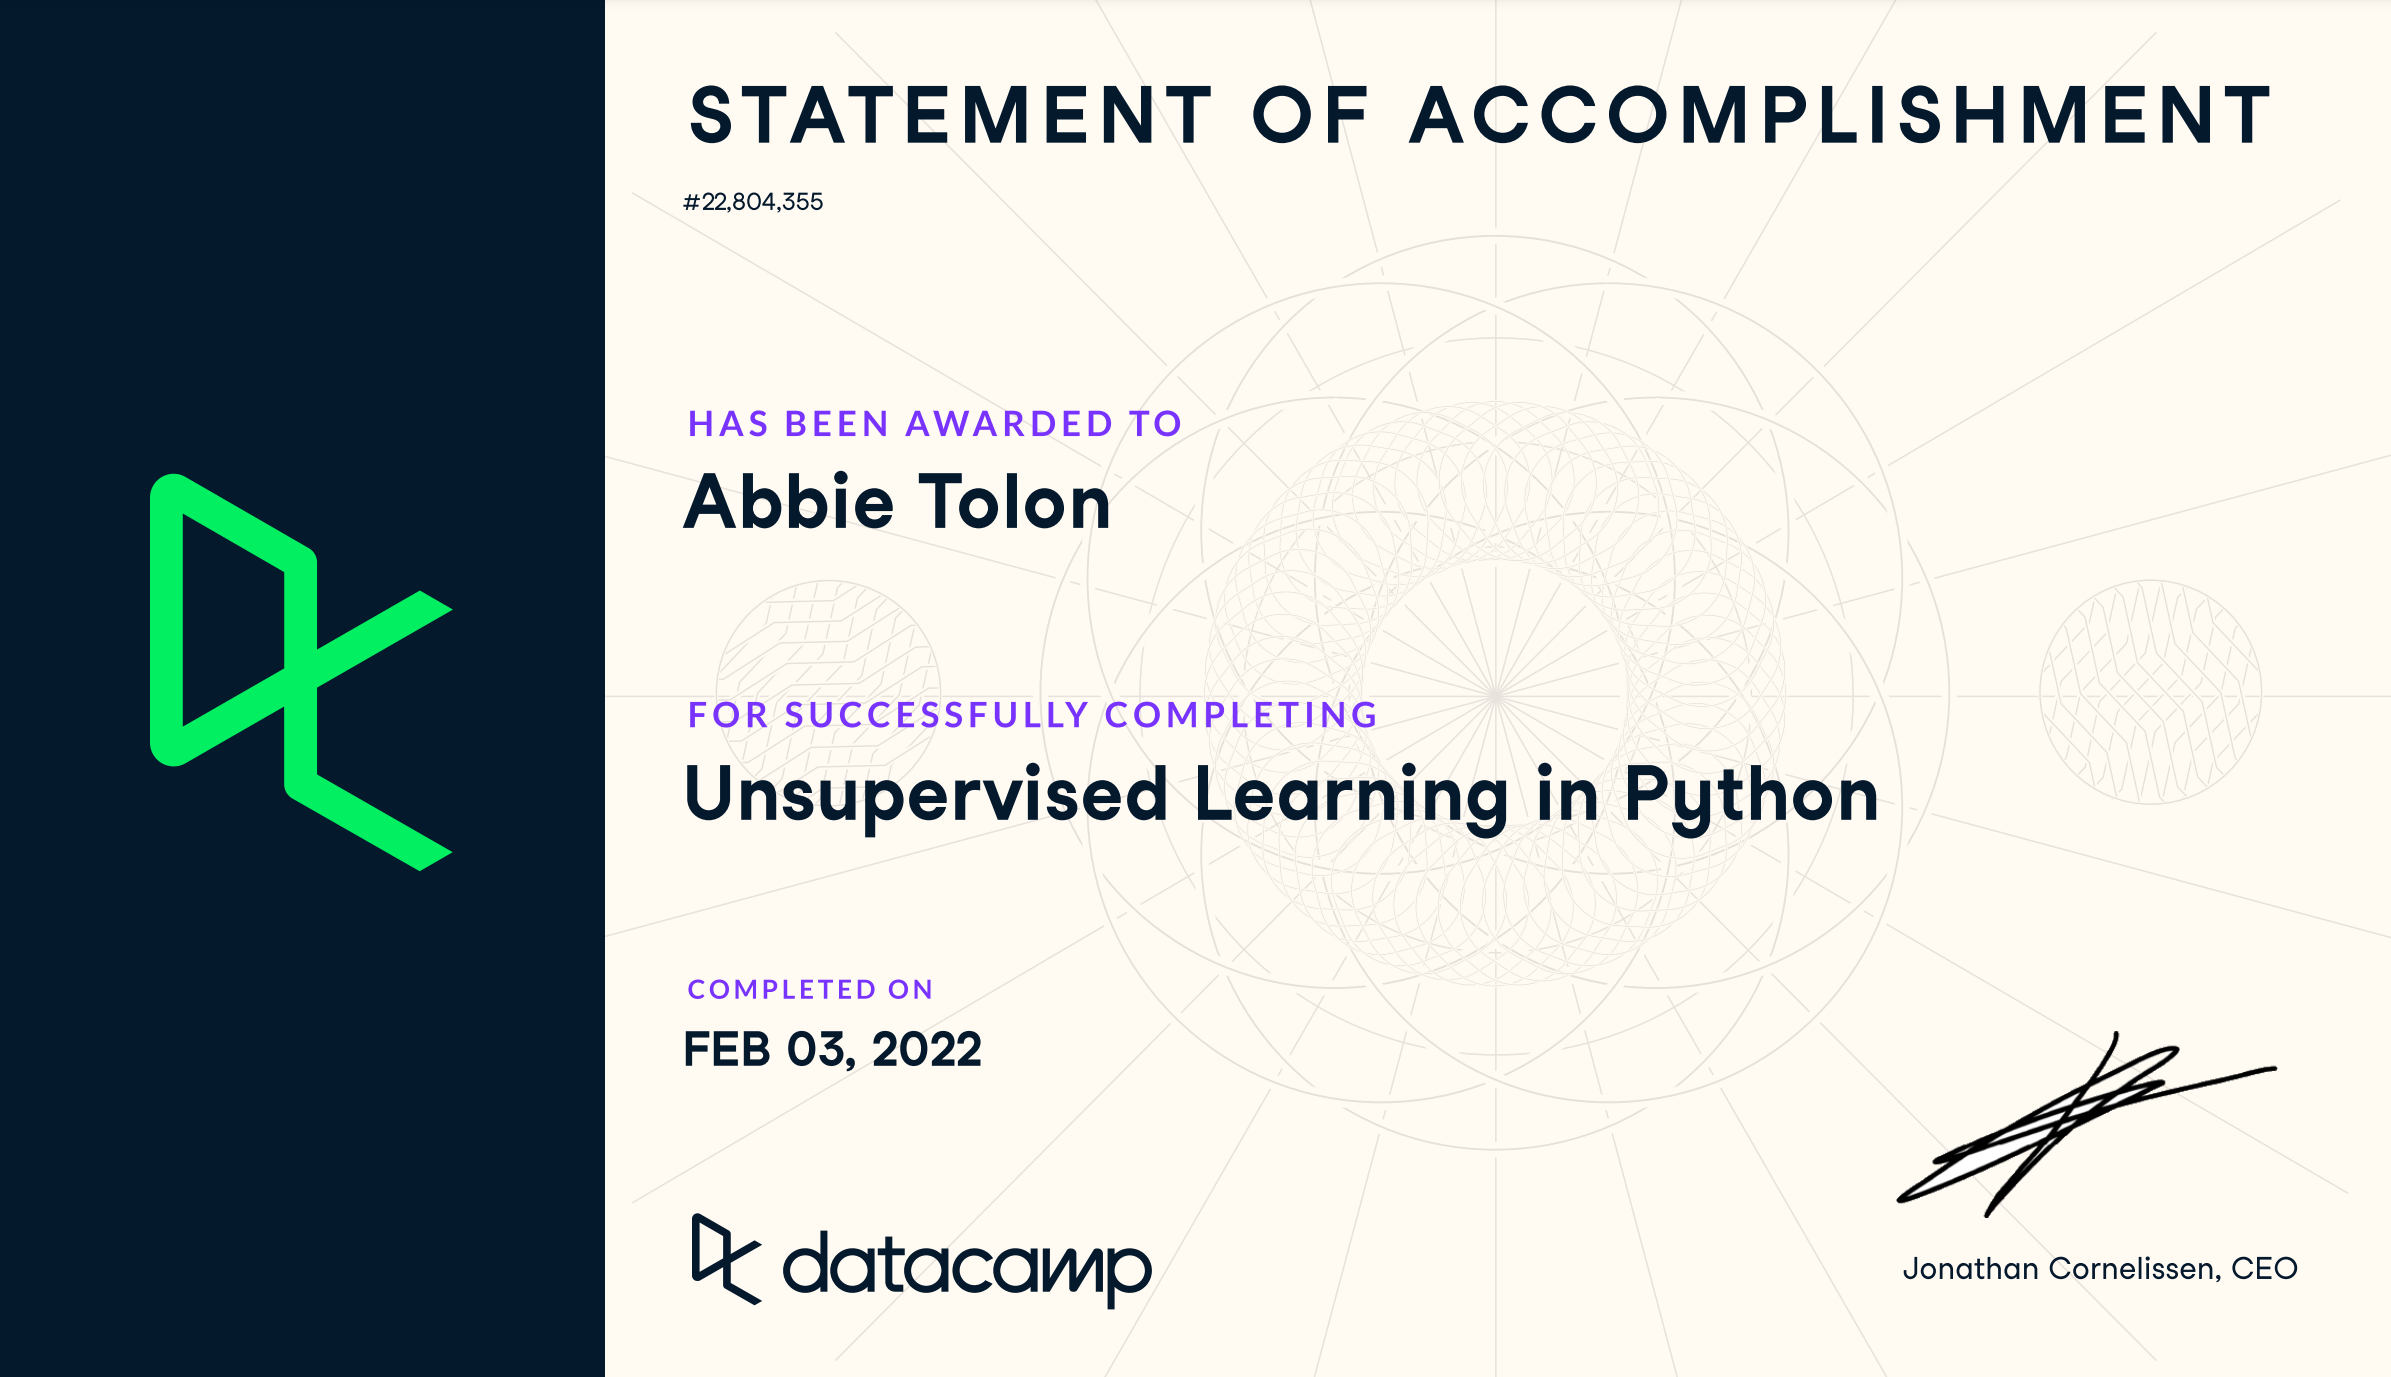